In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import show_dist, plot_hist_numerical, count_unique_values, show_group_stats_viz

sns.set()

%load_ext autoreload
%autoreload

In [2]:
FILE = 'cs-training.csv'

orig_data = pd.read_csv(FILE)

orig_data.head()

,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
orig_data.shape

(150000, 12)

In [4]:
orig_data.columns

Index(['id', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [5]:
orig_data['SeriousDlqin2yrs'].unique()

array([1, 0])

In [6]:
orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [7]:
orig_data.isnull().sum()

id                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

### Campi con null
vi sono due feature con un numero significativo di valori null, in particolare: MonthlyIncome e NumberOfDependents

### Valori distinti:

In [8]:
cat_columns = ['age','NumberOfTime30-59DaysPastDueNotWorse',
               'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
               'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
               'NumberOfDependents']

count_unique_values(orig_data, cat_columns)

,column,cardinality
age,age,86
NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse,16
NumberOfOpenCreditLinesAndLoans,NumberOfOpenCreditLinesAndLoans,58
NumberOfTimes90DaysLate,NumberOfTimes90DaysLate,19
NumberRealEstateLoansOrLines,NumberRealEstateLoansOrLines,28
NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,13
NumberOfDependents,NumberOfDependents,13



 Plot n. 1


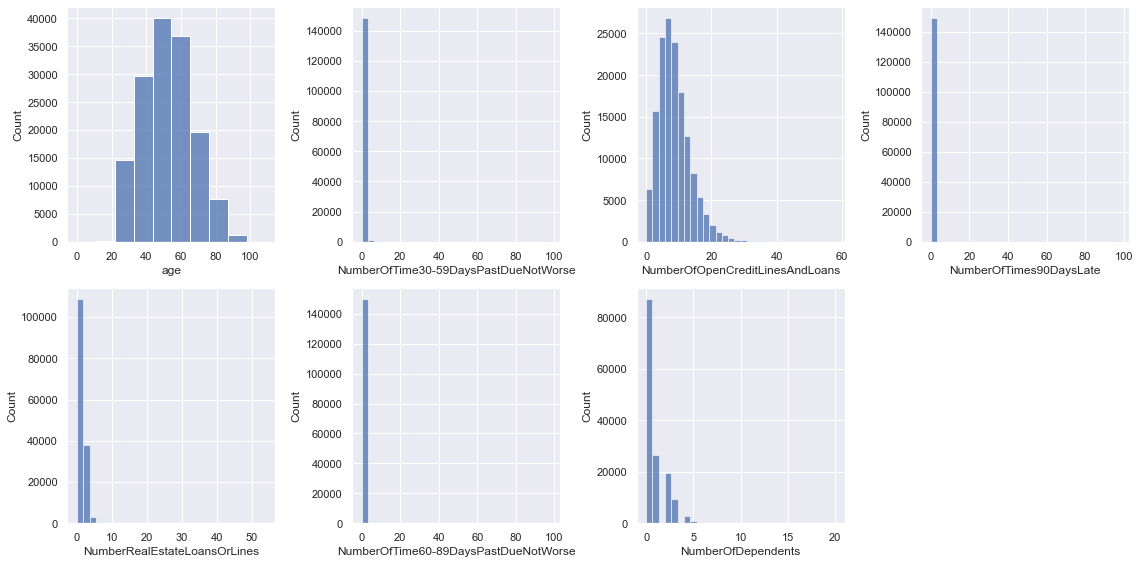

In [9]:
# number of bins for corresponding hist.
%autoreload
vet_bins = [10, 30, 30, 30, 30, 30, 30]

print('\n Plot n. 1')
plot_hist_numerical(orig_data, cat_columns, vet_bins)

SeriousDlqin2yrs
0    139974
1     10026
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


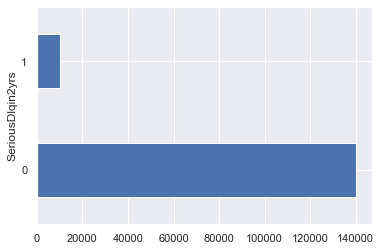

In [10]:
show_group_stats_viz(orig_data, 'SeriousDlqin2yrs');

### il Dataset è fortemente sbilanciato: solo il 6.7% è positivo (abbastanza atteso)

In [11]:
# analizziamo il dataset di test

FILE_TEST = 'cs-test.csv'

orig_test = pd.read_csv(FILE_TEST)

orig_test.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [12]:
orig_test.isnull().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

### anche nel dataset di test MonthlyIncome e NumberOfDependents contengono NaN

quindi lo stesso preprecessing che si deve fare per training deve essere applicato a test

In [13]:
orig_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [14]:
df_stats = orig_data.describe().transpose()

In [15]:
# mean_mi = df_stats.loc['MonthlyIncome', 'mean']
# mean_nod = df_stats.loc['NumberOfDependents', 'mean']

# per inputation uso:
# NumberOfDependents, la moda = 0
# Monthly income: la mediana = 50 perc = 
mode_nod = 0
med_mi = df_stats.loc['MonthlyIncome', '50%']

In [16]:
# inpute

# make a copy
df = orig_data.copy()

In [17]:
# inpute MonthlyIncome

condition = (df['MonthlyIncome'].isna())

df['isna_mi'] = 0

df.loc[condition, 'isna_mi'] = 1
df.loc[condition, 'MonthlyIncome'] = med_mi

In [18]:
# inpute 

condition = (df['NumberOfDependents'].isna())

df['isna_nod'] = 0

df.loc[condition, 'isna_nod'] = 1
df.loc[condition, 'NumberOfDependents'] = mode_nod

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         150000 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [20]:
# save the transformed dataset
df.to_csv('cs-training-nonull.csv', index=False)